In [1]:
import numpy as np
import pandas as pd

from lets_plot import *
from lets_plot.plot.coord import coord_polar


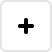
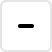
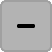
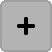
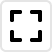
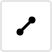
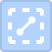
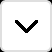
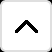
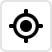
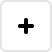
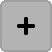
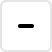
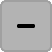
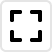
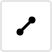
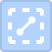
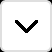
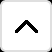
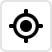

In [2]:
LetsPlot.setup_html()

#### Set `theme_gray()` as default theme. It improves plots readability.

In [3]:
LetsPlot.set_theme(theme_grey())

#### Data

In [4]:
labels_df = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'y': [0, 45, 90, 135, 180, 225, 270, 315, 360],
    'r_y': [360, 315, 270, 225, 180, 135, 90, 45, 0],
    'l': ['l0', 'l45', 'l90', 'l135', 'l180', 'l225', 'l270', 'l315', 'l360'],
    'g': ['g1', 'g1', 'g1', 'g2', 'g2', 'g2', 'g3', 'g3', 'g3']
}

lollipop_df = {
    'x': [1, 2, 3, 4, 5, 6],
    'y': [1, 2, 3, 4, 5, 6],
}

##### Util for `PlotSpecDebugger.kt`

In [5]:
def dump_plot(plot, display=False):
    import json

    try:
        import clipboard
    except:
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True

    return plot

# Geoms

## `geom_label()`
Regular scatter plot.

In [6]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label()

gggrid([
    p, 
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('theta=y'),
])

In [7]:
dump_plot(gggrid([
    #p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('theta=y'),
]))

With discrete `x` the domain is extended so that the first value doesn't overlap the last (see breaks and position of `l0` and `l360` in contrast with the previous cell):

In [8]:
p = ggplot(labels_df, aes(x='l', y='y', label='l')) + geom_label()

p + coord_polar()

## `geom_path()`
The transform resamples path data by converting straight segments into curves. The `flat` parameter controls this behaviour.

In [9]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu')

gggrid([
    p + geom_path(size=3) + coord_polar() + ggtitle('coord_polar()'),
    p + geom_path(size=3, flat=True) + coord_polar(theta="x") + ggtitle('coord_polar(), flat=True'),
], ncol=2)

In [10]:
dump_plot(p + geom_path(size=3) + coord_polar() + ggtitle('coord_polar()'))

## `geom_lollipop()`
See the `Params` section for details on using the `xlim` parameter.

In [11]:
p = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop()

gggrid([
    p, 
    p + coord_polar(xlim=[1, 7])
])

## `geom_rect()`
### Stacked rects are transformed into a pie chart

In [12]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='blue', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='green', size=0) 

gggrid([
    p,
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
]).show()

gggrid([
    p + coord_polar(theta='y', direction=-1) + ggtitle('coord_polar(theta=y, dir=-1)'),
    p + coord_polar(theta='y', direction=-1, start=3.14/2) + ggtitle('coord_polar(theta=y, dir=-1, start=PI/2)'),
]).show()



### Dodged rects are transformed into something interesting

In [13]:
p = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p, 
    p + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

## `geom_bar()` 
This works similarly to rects, but with the addition of tooltips.

In [14]:
from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)

gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=stack, coord_polar(theta=y)'),
    p + coord_polar(theta='x') + ggtitle('position=stack, coord_polar(theta=x)'),
])

In [15]:
p = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0, position='dodge')

gggrid([
    p,
    p + coord_polar(theta='y') + ggtitle('position=dodge, coord_polar(theta=y)'),
    dump_plot(p + coord_polar(theta='x') + ggtitle('position=dodge, coord_polar(theta=x)')),
])

## `geom_hline()`/`geom_vline()`

In [16]:
p = ggplot() \
    + geom_hline(yintercept=5, color='red') \
    + geom_hline(yintercept=10, color='green') \
    + geom_hline(yintercept=15, color='blue') \
    + geom_hline(yintercept=20, color='orange') \
    + geom_vline(xintercept=10, color='pink') \
    + geom_vline(xintercept=20, color='magenta') \
    + geom_vline(xintercept=30, color='dark_green') \
    + xlim(0, 30)\
    + ylim(0, 20)
gggrid([p, dump_plot(p + coord_polar())])

# Params

In [17]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + geom_path(size=3, show_legend=False) + scale_color_brewer(palette='GnBu')


p + coord_polar() + ggtitle('Default plot with coord_polar()')

### `direction`

In [18]:
dump_plot((p + coord_polar(direction=-1) + ggtitle('coord_polar(direction=-1)')))

### `start`

In [19]:
gggrid([
    p + coord_polar(start=3.14 / 2) + ggtitle('start=PI/2'),
    p + coord_polar(start=-3.14 / 2) + ggtitle('start=-PI/2'),
])

### `direction` + `start`

In [20]:
gggrid([
    p + coord_polar(start=3.14 / 2, direction=-1) + ggtitle('dir=-1, start=PI/2'),
    p + coord_polar(start=-3.14 / 2, direction=-1) + ggtitle('dir=-1, start=-PI/2'),
])

### `xlim`
Allows to fix overlapping between first and last value, e.g. for `geom_lollipop` or `radar`.

In [21]:
p = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop()

gggrid([
    p + coord_polar(),
    p + coord_polar(xlim=[1, 7])
])

### `ylim`
Move data from the center. Usefull for radar plot.

In [22]:
data = {
    'subj': ['progr', 'math', 'physic', 'chemistry', 'biology'],
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['John'] * 5,
    'score': [19, 15, 18, 12, 9]
}

p = ggplot(data) \
    + geom_path(aes(x='subj', y='score', color='student'), flat=True) \
    + geom_point(aes(x='subj', y='score', color='student'))

gggrid([
    p + coord_polar(),
    p + coord_polar(ylim=[0, 20])
])                

# Theme

In [23]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + scale_color_brewer(palette='GnBu') + geom_path(size=3, show_legend=False)

## Themes list:

In [24]:
gggrid([
    p,
    p + theme_minimal2() + coord_polar(),
    p + theme_bw() + coord_polar(),
    p + theme_classic() + coord_polar(),
    p + theme_grey() + coord_polar(),
    p + theme_light() + coord_polar(),
    p + theme_minimal() + coord_polar(),
    p + theme_none() + coord_polar(),
    p + theme_void() + coord_polar(),
], ncol=3)

## Theme configuration:

In [25]:
p_tmp = p + theme(
    axis_line_y=element_line(color='red', size=2),
    axis_line_x=element_line(color='blue', size=2),
    axis_ticks_length_y=5,
    axis_ticks_length_x=10,
    axis_ticks_y=element_line(size=5, color='red'), 
    axis_ticks_x=element_line(size=3, color='blue'),
    axis_text_x=element_text(color='blue'),
    axis_text_y=element_text(color='red'),
)

dump_plot(gggrid([
    p_tmp,
    p_tmp + coord_polar()
]))

# Issues

In [26]:
data = {
    'x': ['txt 1', 'txt 2', 'txt 3', 'txt 4'],
    'y': [1, 2, 3, 4],
}
ggplot(data, aes('x', 'y')) + geom_point() + coord_polar()

##### 1. Ticks overlapping

# Regressions

Make sure that axis and grid alignment is still working in all cases:
- coord_flip
- title
- top/bottom/left/right
- marginal
- facet

In [27]:
p = ggplot(labels_df, aes(x='x', y='y', color='y')) + geom_path(size=3) + scale_color_brewer(palette='GnBu') + theme_light()
default = p + ggtitle('Default')
both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + ggtitle('Both')
flip = p + coord_flip() + ggtitle('coord_flip()')
flip_both = p + scale_x_continuous(position='both') + scale_y_continuous(position='both') + coord_flip() + ggtitle('both + coord_flip()')
facet = p + facet_grid(x='g') + ggtitle('Facet')
facet_both = both + facet_grid(x='g') + ggtitle('Facet Both')
facet_flip = flip + facet_grid(x='g') + ggtitle('Facet Flip')
facet_flip_both = flip_both + facet_grid(x='g') + ggtitle('Facet Flip Both')

g = gggrid([
    default,
    both,
    flip,
    flip_both,
    facet, 
    facet_both,
    facet_flip,
    facet_flip_both
], ncol=1)

g

Single plot review:

In [28]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_label()

p_rect_stack = ggplot() \
    + geom_rect(xmin=0, xmax=5, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=7, ymax=11, fill='blue', size=0) \
    + geom_rect(xmin=0, xmax=5, ymin=11, ymax=14, fill='green', size=0) \


p_rect_dodge = ggplot() \
    + geom_rect(xmin=0, xmax=1, ymin=0, ymax=7, fill='red', size=0) \
    + geom_rect(xmin=1, xmax=2, ymin=0, ymax=4, fill='blue', size=0) \
    + geom_rect(xmin=2, xmax=3, ymin=0, ymax=3, fill='green', size=0) \

gggrid([
    p_rect_dodge, 
    p_rect_dodge + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_dodge + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
])

from lets_plot.mapping import as_discrete
bar_df = { 'foo': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3] }
p_bar_stack = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0)
p_bar_dodge = ggplot(bar_df) + geom_bar(aes(fill=as_discrete('foo', order=1)), size=0, position='dodge')

# lollipop
p_lollipop = ggplot(lollipop_df, aes('x', 'y')) + geom_lollipop() + coord_polar(xlim=[1, 7])

# radar
data = {
    'subj': ['a', 'b', 'c', 'd', 'e'],
    'subj_id': [1, 2, 3, 4, 5],
    'student': ['John'] * 5,
    'score': [19, 15, 18, 12, 9]
}

p_radar = ggplot(data) \
    + geom_path(aes(x='subj', y='score', color='student'), flat=True) \
    + geom_point(aes(x='subj', y='score', color='student'))\
    + coord_polar(ylim=[0, 20])

gggrid([
    p + coord_polar() + ggtitle('coord_polar()'),
    p + coord_polar(theta='y') + ggtitle('theta=y'),
    None,
    p_rect_stack + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_stack + coord_polar(theta='y', direction=-1) + ggtitle('coord_polar(theta=y, dir=-1)'),
    p_rect_stack + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
    p_rect_dodge, 
    p_rect_dodge + coord_polar(theta='y') + ggtitle('coord_polar(theta=y)'),
    p_rect_dodge + coord_polar(theta='x') + ggtitle('coord_polar(theta=x)'),
    p_bar_stack,
    p_bar_stack + coord_polar(theta='y') + ggtitle('position=stack, coord_polar(theta=y)'),
    p_bar_stack + coord_polar(theta='x') + ggtitle('position=stack, coord_polar(theta=x)'),
    p_bar_dodge,
    p_bar_dodge + coord_polar(theta='y') + ggtitle('position=dodge, coord_polar(theta=y)'),
    p_bar_dodge + coord_polar(theta='x') + ggtitle('position=dodge, coord_polar(theta=x)'),
    p_lollipop,
    p_radar
], ncol=3)

# Sandbox

In [29]:
mpg = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv')
mpg

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [30]:
ggplot(mpg) + geom_bar(aes(x='model', y='cty', fill='cty'), stat='identity', position='dodge') + scale_fill_gradient(low='red', high='white', limits=(5,40)) + theme_void()

In [31]:
_ + coord_polar()

In [32]:
p = ggplot(labels_df, aes(x='x', y='y', label='l')) + geom_point(alpha=0.3, color='red') + geom_text()
gggrid([
    p + coord_polar(theta='x'),
    p + coord_polar(theta='y'),
])

# `ggplot2` ticks comparison:

In [33]:
from IPython.display import SVG, Image, HTML

In [34]:
p = ggplot() \
    + geom_rect(xmin=-5, xmax=0, ymin=0, ymax=5, fill='red', size=0) \
    + geom_rect(xmin=-5, xmax=0, ymin=5, ymax=7.5, fill='green', size=0) \
    + theme_grey()
p

Actual:


Expected (ggplot2)


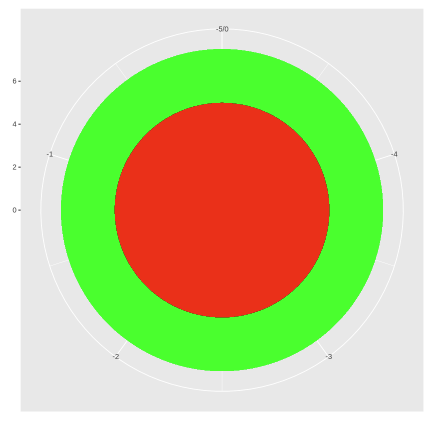

In [35]:
print("Actual:")
(p + coord_polar(theta = "x")).show()

print("Expected (ggplot2)")
display(Image("lets-plot-images/coord_polar_ggplot_theta_x.png"))

Actual


Expected (ggplot2):


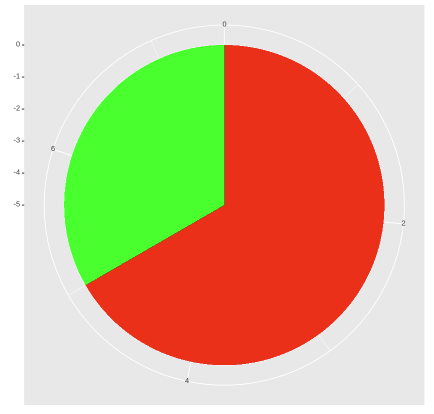

In [36]:
print("Actual")
(p + coord_polar(theta = "y")).show()
print("Expected (ggplot2):")
display(Image("lets-plot-images/coord_polar_ggplot_theta_y.png"))